In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
from random import shuffle
sequence = np.arange(10)
shuffle(sequence)
print(sequence)

[9 1 0 2 3 5 7 4 6 8]


In [93]:
def NA_model_all(mean,var):
    na1 = mean + np.sqrt(var)*np.random.randn()
    return na1

def PA_model_all(na1,var):
    pa1 = -0.3*na1+np.sqrt(var)*np.random.randn()
    return pa1

def INT_model_all(int0,var):
    int1 = 0.4*int0+np.sqrt(var)*np.random.randn()
    return int1

def EXE_model_all(exe0,int1,var):
    exe1= 0.5*exe0 - 0.3*int1+np.sqrt(var)*np.random.randn()
    return exe1

def EXE_model_select1(exe1,na1,var):
    exe1 = exe1-0.3*na1+np.sqrt(var)*np.random.randn()
    return exe1

def INT_model_select1(int1):
    int1 = int1+0.5*np.random.uniform()
    return int1

def EXE_model_select2(exe1,pa1,var):
    exe1=  exe1 + 0.1*pa1+np.sqrt(var)*np.random.randn()
    return exe1

def PA_model_select2(int1,var):
    pa1 = -0.3*int1+np.sqrt(var)*np.random.randn()
    return pa1


[3, 8, 6, 1, 2]


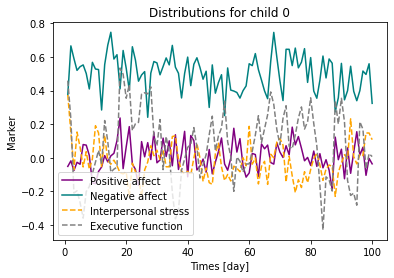

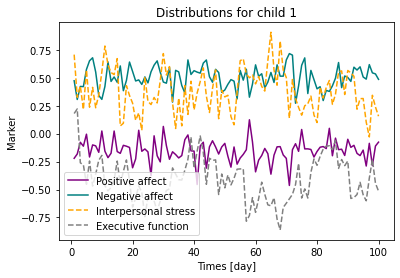

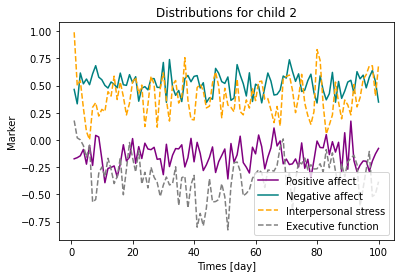

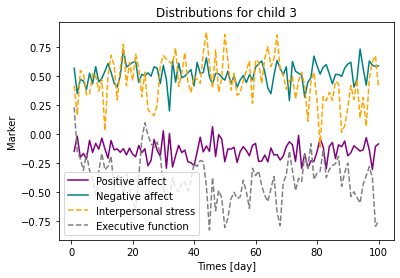

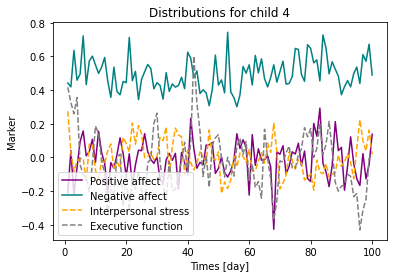

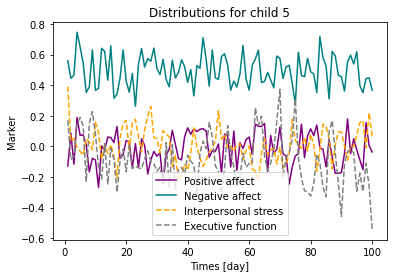

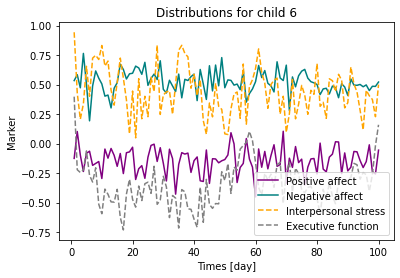

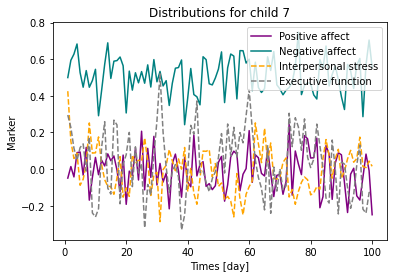

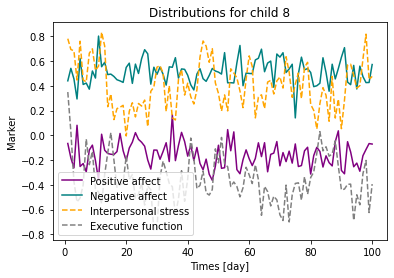

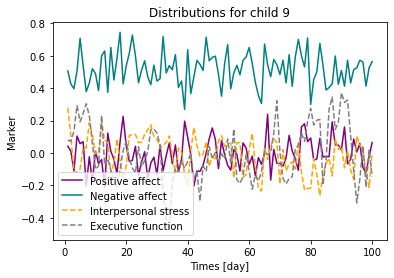

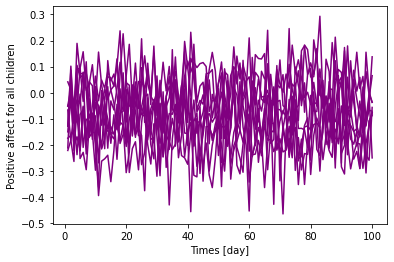

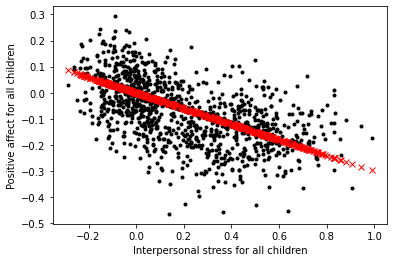

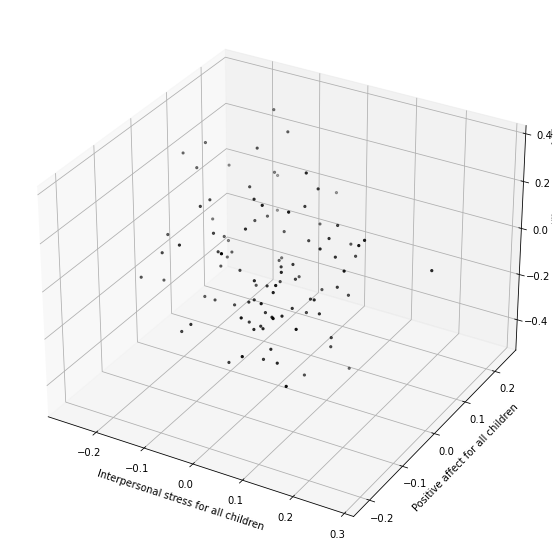

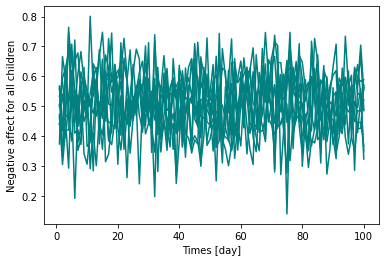

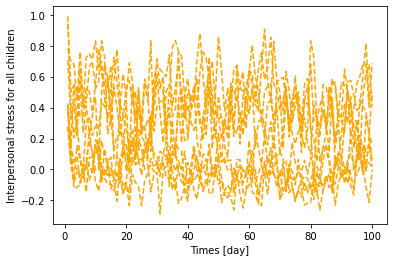

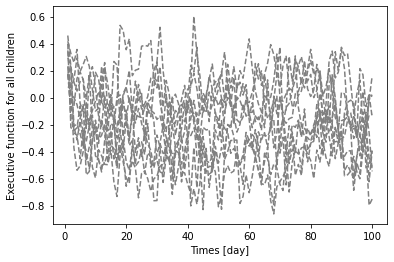

In [108]:
times=np.linspace(0,100,101)
num_children = 10
mean_na = 0.5
var_na = 0.01
var_pa = 0.01
var_exe = 0.01
var_int = 0.01
inds_group1 = random.sample(range(num_children), 5)
print(inds_group1)
pa = np.zeros((num_children,len(times)))
na = np.zeros((num_children,len(times)))
exe = np.zeros((num_children,len(times)))
intp = np.zeros((num_children, len(times)))

na[:,0] = 1.0
pa[:,0] = 1.0
intp[:,0] = 1.0
exe[:,0] = 1.0

for child,nc in enumerate(range(num_children)):
    plt.figure(child)
    for count,t in enumerate(times[0:-1]):
        na[nc,count+1] = NA_model_all(mean_na,var_na)
        pa[nc,count+1]= PA_model_all(na[nc,count+1],var_pa)
        intp[nc,count+1] = INT_model_all(intp[nc,count], var_int)
        exe[nc,count+1]= EXE_model_all(exe[nc,count],intp[nc,count+1], var_exe)

        if child in inds_group1:
            flag = 'boost'
            #print('ok boosting, child = %i'%child)
            exe[nc,count+1] = EXE_model_select1(exe[nc,count+1], na[nc,count+1], var_exe)
            intp[nc,count+1] = INT_model_select1(intp[nc,count+1])
        else:
            #print('not boosting for child = %i'%child)
            flag = 'no_boost'
            pa[nc,count+1] = PA_model_select2(intp[nc,count+1], var_exe)
            exe[nc,count+1] = EXE_model_select2(exe[nc,count+1], pa[nc,count+1], var_int)
    
    mat = [times[1:], na[nc,1:], pa[nc,1:],intp[nc,1:],exe[nc,1:]]
    np.savetxt('variables_child_%i_%s.csv'%(nc,flag), np.transpose(mat), delimiter=',')
    plt.plot(times[1:], pa[nc,1:], label='Positive affect', linestyle='-', color='purple')
    plt.plot(times[1:], na[nc,1:], label='Negative affect',linestyle='-', color='teal')
    plt.plot(times[1:], intp[nc,1:], label='Interpersonal stress',linestyle='--', color='orange')
    plt.plot(times[1:], exe[nc,1:], label='Executive function',linestyle='--', color='gray')
    plt.xlabel('Times [day]')
    plt.ylabel('Marker')
    leg = plt.legend()
    plt.title(r'Distributions for child %i'%child)
    plt.savefig('distributions_child%i.png'%child)
    
    
    
for child,nc in enumerate(range(num_children)):
    plt.figure(101)
    plt.plot(times[1:], pa[nc,1:], label='child %i'%child, linestyle='-', color='purple')
    plt.xlabel('Times [day]')
    plt.ylabel('Positive affect for all children')

    
    plt.figure(121)
    plt.plot(intp[nc,1:], pa[nc,1:],marker='.', linestyle='None', color='black')
    plt.plot(intp[nc,1:], -0.3*intp[nc,1:], color='r', marker='x', linestyle='None')
    plt.ylabel('Positive affect for all children')
    plt.xlabel('Interpersonal stress for all children')
    
    fig = plt.figure(131, figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(intp[nc,1:], pa[nc,1:], exe[nc,1:],marker='.', linestyle='None', color='black')
    #plt.plot(intp[nc,1:], -0.3*intp[nc,1:], color='r', marker='x', linestyle='None')
    plt.ylabel('Positive affect for all children')
    plt.xlabel('Interpersonal stress for all children')
    
#     plt.figure(131)
#     plt.plot(pa[nc,:], exe[nc,:],marker='.', linestyle='None', color='black')
#     plt.plot(pa[nc,:], 0.1*exe[nc,:], color='r', marker='x', linestyle='None')
#     plt.xlabel('PA for all children')
#     plt.ylabel('EXE for all children')
    
    plt.figure(202)
    plt.plot(times[1:], na[nc,1:], label='child %i'%child,linestyle='-', color='teal')
    plt.xlabel('Times [day]')
    plt.ylabel('Negative affect for all children')
    
    plt.figure(303)
    plt.plot(times[1:], intp[nc,1:], label='child %i'%child,linestyle='--', color='orange')
    plt.xlabel('Times [day]')
    plt.ylabel('Interpersonal stress for all children')
    
    plt.figure(404)
    plt.plot(times[1:], exe[nc,1:], label='child %i'%child,linestyle='--', color='gray')
    plt.xlabel('Times [day]')
    plt.ylabel('Executive function for all children')
    